In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
#load dataset
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [3]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.
2021-12-21 13:33:51.967635: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Baseline: -33.31 (21.38) MSE


In [5]:
%store -r pv_eff

no stored variable or alias pv_eff


In [ ]:
print(X[:2,:])
print(Y[:2])
print(len(pv_eff))

  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K


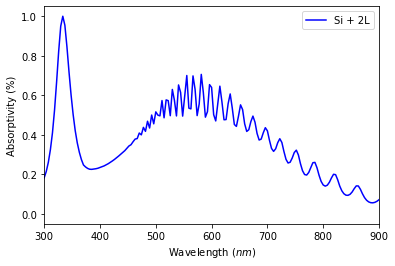

In [13]:
from numpy import random
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import numpy as np
import time

### Define a 2 micron silicon slab with a SiO2 and AlN coating...
### we will optimize over the SiO2 and AlN coatings only.
### Si with 2-layer AR coating
dof2_structure = {
        'Material_List' : ['Air', 'AlN', 'SiO2', 'AlN','SiO2', 'Si','Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 35.70e-9, 20e-9, 5e-9, 3e-9, 2000e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000]
        }

pv_2l = multilayer(dof2_structure)
plt.plot(pv_2l.lambda_array*1e9, pv_2l.emissivity_array, 'blue', label='Si + 2L')
plt.xlim(300,900)
plt.ylabel('Absorptivity (%)')
plt.xlabel('Wavelength ($nm$)')
plt.legend()

def update_pv_efficiency(d1, d2, d3, d4, rand=False):
    rand_max = 400
    if random:
        d1 = random.uniform(1, rand_max)
        d2 = random.uniform(1, rand_max)
        d3 = random.uniform(1, rand_max)
        d4 = random.uniform(1, rand_max)
        pv_2l.d[1] = d1 * 1e-9
        pv_2l.d[2] = d2 * 1e-9
        pv_2l.d[3] = d3 * 1e-9
        pv_2l.d[4] = d4 * 1e-9
    else:
        pv_2l.d[1] = d1 * 1e-9
        pv_2l.d[2] = d2 * 1e-9
        pv_2l.d[3] = d3 * 1e-9
        pv_2l.d[4] = d4 * 1e-9
        
    pv_2l.fresnel()
    pv_2l.pv_conversion_efficiency()
    return d1 / rand_max, d2 / rand_max, d3 / rand_max, d4 / rand_max, pv_2l.conversion_efficiency_val


In [ ]:
        
dim = 10000

f = open('pv_large.csv', 'w')
for i in range(0, dim):
    d1, d2, d3, d4, pv_2l.conversion_efficiency_val = update_pv_efficiency(1.0, 2.0, 3.0, 4.0, rand=True)
    #print(d1, d2, d3, d4, pv_2l.conversion_efficiency_val)
    pr_str = str(d1) + ", " + str(d2) + ", " + str(d3) + ", "
    pr_str += str(d4) + ", " + str(pv_2l.conversion_efficiency_val)
    pr_str += "\n"
    f.write(pr_str)
    
f.close()
        

In [ ]:
print(PV_Y*100)

In [17]:
print(update_pv_efficiency(1.0, 2.0, 3.0, 4.0, rand=False))

(0.8305694447410932, 0.03832207713616056, 0.31393311121382494, 0.6361623319319516, 0.05061199077126367)


In [16]:
# define the keras model
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(PV_X, PV_Y, epochs=20, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(PV_X, PV_Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20


ValueError: in user code:

    File "/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/envs/wptbeta/lib/python3.7/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 5), found shape=(10, 8)


In [ ]:
d1 = random.uniform(1, 400)
d2 = random.uniform(1, 400)
pv_2l.d[1] = d1 * 1e-9
pv_2l.d[2] = d2 * 1e-9
pv_2l.fresnel()
pv_2l.pv_conversion_efficiency()
X_TEST = np.array([d1 / 400., d2 / 400.])
Y_TEST = np.array([pv_2l.conversion_efficiency_val])


Y_GUESS = model.predict(PV_X)
mse = (np.square(Y_GUESS - PV_Y)).mean(axis=None)
print(mse)

In [ ]:
# define base model
def pv_model():
    # create model
    model = Sequential()
    model.add(Dense(2, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=pv_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, PV_X, PV_Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))